## Cross Sell/Upsell-
Upselling is the practice of encouraging customers to purchase a comparable higher-end product than the one in question, while cross-selling invites customers to buy related or complementary items.

## Dataset-
The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [31]:
dataset = pd.read_csv("/home/webhav/studymaterial/clustering/clustering_algorithms/CC_GENERAL.csv")

In [32]:
dataset = dataset.drop(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','CUST_ID'],axis=1)

In [33]:
dataset = clean_dataset(dataset)
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,0.818182,95.40,1000.0,201.802084,139.509787,12.0
1,3202.467416,0.909091,0.00,7000.0,4103.032597,1072.340217,12.0
2,2495.148862,1.000000,773.17,7500.0,622.066742,627.284787,12.0
4,817.714335,1.000000,16.00,1200.0,678.334763,244.791237,12.0
5,1809.828751,1.000000,1333.28,1800.0,1400.057770,2407.246035,12.0


In [18]:
X = dataset

In [8]:
# #Normalise data-
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)

In [49]:
#choosing optimum clusters using elbow method-
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

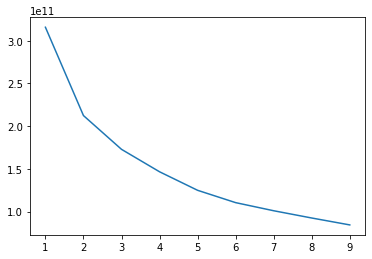

In [51]:
plt.plot(range(1,10), wcss)

In [52]:
#creating clusters with optimum value 
y_kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_means = y_kmeans.fit(X)
#y_means_predict = y_kmeans.fit_predict(X)

In [34]:
dataset['cluster'] = y_means.labels_

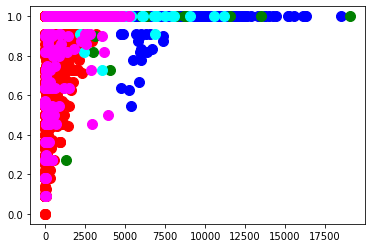

In [16]:
plt.scatter(X[y_means_predict ==0, 0],X[y_means_predict == 0, 1], s = 100, c='red',label = 'Cluster1' )
plt.scatter(X[y_means_predict ==1, 0],X[y_means_predict == 1, 1], s = 100, c='blue',label = 'Cluster2' )
plt.scatter(X[y_means_predict ==2, 0],X[y_means_predict == 2, 1], s = 100, c='green',label = 'Cluster3' )
plt.scatter(X[y_means_predict ==3, 0],X[y_means_predict == 3, 1], s = 100, c='cyan',label = 'Cluster4' )
plt.scatter(X[y_means_predict ==4, 0],X[y_means_predict == 4, 1], s = 100, c='magenta',label = 'Cluster5' )

### Analysis

In [27]:
load_clusters()

Average PAYMENTS paid by each cluster-

[6177, 1323, 27159, 1534, 2592]


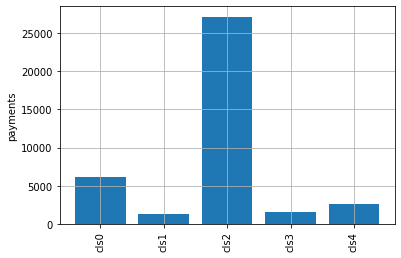

In [53]:
clusters = ["cls0","cls1","cls2","cls3","cls4"]
total_payments = [payment_cluster0,payment_cluster1,payment_cluster2,payment_cluster3,payment_cluster4]
print(total_payments)
plt.bar(clusters, total_payments)
plt.grid()
plt.ylabel('payments')
plt.xticks(rotation='vertical')
plt.show()

Risk Factor - 
Average Balance in account vs Credit Spend-

In [54]:
df2 = pd.DataFrame(list(zip(balance_mean, total_payments,cls)),columns =['Account_balance', 'creditamount','cluster'])
print(df2.to_string(index = False))

 Account_balance  creditamount  cluster
            2030          6177        0
            1811          1323        1
            5351         27159        2
            4438          1534        3
            7207          2592        4


Credit Limit vs spendatures-

In [48]:
df3 = pd.DataFrame(list(zip(total_payments,limit_cluster,percent_spend,cls)),columns =[ 'credit_taken','credit_limit','percent','cluster'])
print(df3.to_string(index = False))

 credit_taken  credit_limit  percent  cluster
         6177          6295       98        0
         1323          6153       21        1
        27159         16360      166        2
         1534          4652       32        3
         2592         10852       23        4
          884          2059       42        5
        16140         12347      130        6
         2063         12408       16        7


In [ ]:
BALANCE

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [23]:
payment_cluster0 = int(dataset.loc[dataset['cluster'] == 0, 'PAYMENTS'].mean())
payment_cluster1 = int(dataset.loc[dataset['cluster'] == 1, 'PAYMENTS'].mean())
payment_cluster2 = int(dataset.loc[dataset['cluster'] == 2, 'PAYMENTS'].mean())
payment_cluster3 = int(dataset.loc[dataset['cluster'] == 3, 'PAYMENTS'].mean())
payment_cluster4 = int(dataset.loc[dataset['cluster'] == 4, 'PAYMENTS'].mean())
payment_cluster5 = int(dataset.loc[dataset['cluster'] == 5, 'PAYMENTS'].mean())
payment_cluster6 = int(dataset.loc[dataset['cluster'] == 6, 'PAYMENTS'].mean())
payment_cluster7 = int(dataset.loc[dataset['cluster'] == 7, 'PAYMENTS'].mean())

In [35]:
balance_cluster0 = int(dataset.loc[dataset['cluster'] == 0, 'BALANCE'].mean())
balance_cluster1 = int(dataset.loc[dataset['cluster'] == 1, 'BALANCE'].mean())
balance_cluster2 = int(dataset.loc[dataset['cluster'] == 2, 'BALANCE'].mean())
balance_cluster3 = int(dataset.loc[dataset['cluster'] == 3, 'BALANCE'].mean())
balance_cluster4 = int(dataset.loc[dataset['cluster'] == 4, 'BALANCE'].mean())
balance_cluster5 = int(dataset.loc[dataset['cluster'] == 5, 'BALANCE'].mean())
balance_cluster6 = int(dataset.loc[dataset['cluster'] == 6, 'BALANCE'].mean())
balance_cluster7 = int(dataset.loc[dataset['cluster'] == 7, 'BALANCE'].mean())
balance_mean = [balance_cluster0,balance_cluster1,balance_cluster2,balance_cluster3,balance_cluster4,balance_cluster5,balance_cluster6,balance_cluster7]
balance_mean

[2030, 1811, 5351, 4438, 7207, 787, 5402, 1041]

In [38]:
cls = [0,1,2,3,4,5,6,7]

In [41]:
limit_cluster0 = int(dataset.loc[dataset['cluster'] == 0, 'CREDIT_LIMIT'].mean())
limit_cluster1 = int(dataset.loc[dataset['cluster'] == 1, 'CREDIT_LIMIT'].mean())
limit_cluster2 = int(dataset.loc[dataset['cluster'] == 2, 'CREDIT_LIMIT'].mean())
limit_cluster3 = int(dataset.loc[dataset['cluster'] == 3, 'CREDIT_LIMIT'].mean())
limit_cluster4 = int(dataset.loc[dataset['cluster'] == 4, 'CREDIT_LIMIT'].mean())
limit_cluster5 = int(dataset.loc[dataset['cluster'] == 5, 'CREDIT_LIMIT'].mean())
limit_cluster6 = int(dataset.loc[dataset['cluster'] == 6, 'CREDIT_LIMIT'].mean())
limit_cluster7 = int(dataset.loc[dataset['cluster'] == 7, 'CREDIT_LIMIT'].mean())
limit_cluster = [limit_cluster0,limit_cluster1,limit_cluster2,limit_cluster3,limit_cluster4,limit_cluster5,limit_cluster6,limit_cluster7]
limit_cluster

[6295, 6153, 16360, 4652, 10852, 2059, 12347, 12408]

In [46]:
lim = [6295, 6153, 16360, 4652, 10852, 2059, 12347, 12408]
pay = [6177, 1323, 27159, 1534, 2592, 884, 16140, 2063]
percent_spend = []
for i,j in zip(total_payments,limit_cluster):
    percent_spend.append((i*100)//j)
print(percent_spend)

[98, 21, 166, 32, 23, 42, 130, 16]
